In [224]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

In [225]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)


In [226]:
def init_policy(state):
    
    if np.random.random() < 0.8:
        # Zu 80% eine bevorzugte Aktion wählen, wenn möglich
        return np.random.choice([1,2])
    else:
        return np.random.choice([0,3])

[[0.005 0.007 0.016 0.007]
 [0.014 0.    0.044 0.   ]
 [0.034 0.091 0.147 0.   ]
 [0.    0.17  0.455 1.   ]]
272.0


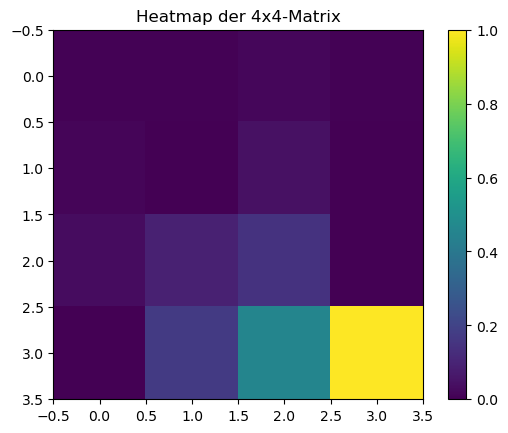

In [227]:
sum_rewards = 0
episodes = 10000
factor = 0.9
values = np.zeros(16)
visits_arr = np.zeros(16)
sum_return = np.zeros(16)


for _ in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False
    time_visited = np.zeros(16)
    time_visited[0] += 1
    visits_arr[0] += 1
    states_t = []
    rewards_t = []
    T = 0

    while True:
        state, reward, terminated, truncated, _ = env.step(init_policy(state))
        T += 1
        states_t.append(state)
        rewards_t.append(reward)

        if time_visited[state] == 0:
            time_visited[state] += 1
            visits_arr[state] += 1
        if terminated or truncated:
            sum_rewards += reward
            g = 0
            
           
            for t in reversed(range(T)):
                current_state = states_t[t]
                g = factor * g + rewards_t[t]
                if current_state not in states_t[:t]:
                    sum_return[current_state] += g
                    values[current_state] = sum_return[current_state] / visits_arr[current_state]
            break

values = np.round(values.reshape(4,4), 3)
print(values)
print(sum_rewards)

# Heatmap erstellen
plt.imshow(values, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Farbskala hinzufügen
plt.title('Heatmap der 4x4-Matrix')
plt.show()

59.0
66.0
8.0
220.0
21.0
5.0
8.0
2.0
75.0
121.0
19.0
24.0
9.0
225.0
16.0
58.0
67.0
11.0
24.0
26.0
76.0
85.0
40.0
303.0
109.0
45.0
69.0
75.0
94.0
5.0
66.0
15.0
15.0
107.0
210.0
98.0
8.0
69.0
130.0
165.0


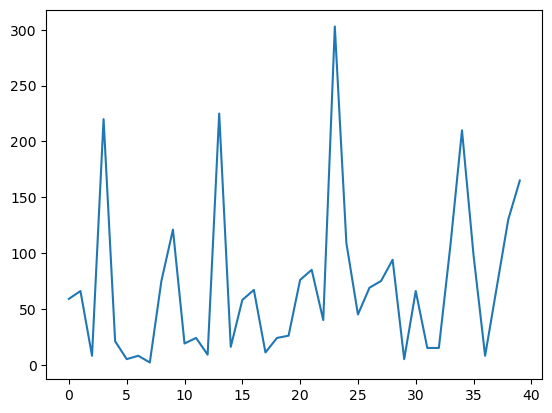

[['↓' '↑' '→' '←']
 ['←' '←' '↓' '←']
 ['→' '←' '↓' '←']
 ['←' '←' '↓' '↓']]


In [240]:
def print_policy(policy):
    arrows = ["←", "↓", "→", "↑"]
    policy = np.array([arrows[state] for state in policy]).reshape((4, 4))
    print(policy)

sum_rewards = 0
factor = 0.8
episodes = 5000
epsilon = 0.8
converged = False
values_arr = []
first_run = True
counter = 0
performance = []

policy = np.zeros(16, dtype=int)


while not converged:
    visits_arr = np.zeros((16, 4))
    values = np.zeros((16, 4))
    sum_return = np.zeros((16, 4))
    counter += 1
    sum_rewards = 0
    
    for _ in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False
        time_visited = np.zeros((16, 4))
        states_actions_t = []
        rewards_t = []
        T = 0
        while True:
            action = None
            if first_run:
                action = env.action_space.sample()
            else:
                if(np.random.random() < epsilon):
                    action = policy[state]
                else:
                    action = env.action_space.sample()

            state, reward, terminated, truncated, _ = env.step(action)
            if T == 0:
                time_visited[0, action] += 1
                visits_arr[0, action] += 1

            T += 1
            states_actions_t.append((state, action))
            rewards_t.append(reward)

            if time_visited[state, action] == 0:
                time_visited[state, action] += 1
                visits_arr[state, action] += 1
            if terminated or truncated:
                sum_rewards += reward
                g = 0

                for t in reversed(range(T)):
                    current_state_action = states_actions_t[t]
                    g = factor * g + rewards_t[t]
                    if current_state_action not in states_actions_t[:t]:
                        sum_return[current_state_action[0],
                                   current_state_action[1]] += g
                        values[current_state_action[0],
                               current_state_action[1]] = sum_return[current_state_action[0],
                                                                     current_state_action[1]] / \
                            visits_arr[current_state_action[0],
                                       current_state_action[1]]
                        values = np.round(values, 5)
                break
    
    converged = True
    performance.append(sum_rewards)
    print(sum_rewards)
    for state in range(16):
        old_policy = policy[state]
        policy[state] = np.argmax(values[state])
        if old_policy != policy[state]:
            converged = False
    first_run = False
    values_arr.append(policy.copy())
    if counter == 40:
        break




plt.plot(performance)
plt.show()
max_index = performance.index(max(performance))
print_policy(values_arr[max_index])

